# Question 1 Linear Regression

In [2]:
import pandas as pd
df = pd.read_excel('HW1-Dataset.xlsx', sheet_name = 'CO-smoke')
df

,TAR,NICOTINE,WEIGHT,CO
0,14.1,0.86,0.9853,13.6
1,16.0,1.06,1.0938,16.6
2,29.8,2.03,1.1650,23.5
3,8.0,0.67,0.9280,10.2
4,4.1,0.40,0.9462,5.4
5,15.0,1.04,0.8885,15.0
6,8.8,0.76,1.0267,9.0
7,12.4,0.95,0.9225,12.3
8,16.6,1.12,0.9372,16.3
9,14.9,1.02,0.8858,15.4


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TAR       25 non-null     float64
 1   NICOTINE  25 non-null     float64
 2   WEIGHT    25 non-null     float64
 3   CO        25 non-null     float64
dtypes: float64(4)
memory usage: 928.0 bytes


(25, 4)

<Figure size 432x288 with 0 Axes>

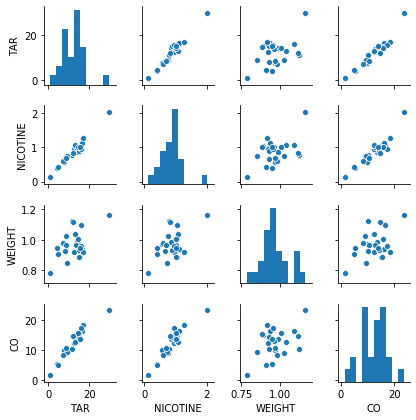

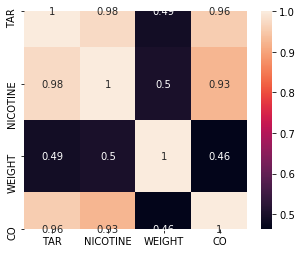

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(); 
sns.pairplot(df,height=1.5, aspect=1);

plt.figure(figsize=(5,4));
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True);
pass;

In [5]:
Y = df.CO
X = df.drop('CO', axis=1)
Y ,X

(0     13.6
 1     16.6
 2     23.5
 3     10.2
 4      5.4
 5     15.0
 6      9.0
 7     12.3
 8     16.3
 9     15.4
 10    13.0
 11    14.4
 12    10.0
 13    10.2
 14     9.5
 15     1.5
 16    18.5
 17    12.6
 18    17.5
 19     4.9
 20    15.9
 21     8.5
 22    10.6
 23    13.9
 24    14.9
 Name: CO, dtype: float64,
      TAR  NICOTINE  WEIGHT
 0   14.1      0.86  0.9853
 1   16.0      1.06  1.0938
 2   29.8      2.03  1.1650
 3    8.0      0.67  0.9280
 4    4.1      0.40  0.9462
 5   15.0      1.04  0.8885
 6    8.8      0.76  1.0267
 7   12.4      0.95  0.9225
 8   16.6      1.12  0.9372
 9   14.9      1.02  0.8858
 10  13.7      1.01  0.9643
 11  15.1      0.90  0.9316
 12   7.8      0.57  0.9705
 13  11.4      0.78  1.1240
 14   9.0      0.74  0.8517
 15   1.0      0.13  0.7851
 16  17.0      1.26  0.9186
 17  12.8      1.08  1.0395
 18  15.8      0.96  0.9573
 19   4.5      0.42  0.9106
 20  14.5      1.01  1.0070
 21   7.3      0.61  0.9806
 22   8.6      0.69  0.9693
 

In [6]:
intercept = True
use_api = True

import statsmodels.api as sm

if intercept:
  Xreg = sm.add_constant(X)
else:
  Xreg = X
Xreg

,const,TAR,NICOTINE,WEIGHT
0,1.0,14.1,0.86,0.9853
1,1.0,16.0,1.06,1.0938
2,1.0,29.8,2.03,1.1650
3,1.0,8.0,0.67,0.9280
4,1.0,4.1,0.40,0.9462
5,1.0,15.0,1.04,0.8885
6,1.0,8.8,0.76,1.0267
7,1.0,12.4,0.95,0.9225
8,1.0,16.6,1.12,0.9372
9,1.0,14.9,1.02,0.8858


In [7]:
from statsmodels.formula.api import ols

if intercept:
  formula = 'CO ~ TAR + NICOTINE + WEIGHT'
else:
  formula = 'CO ~ TAR + NICOTINE + WEIGHT - 1'

if not use_api:
  CO_emitt = ols(formula, data = df).fit()
else:
  CO_emitt = sm.OLS(Y, Xreg).fit()

In [8]:
CO_emitt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CO   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     78.98
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           1.33e-11
Time:                        15:20:34   Log-Likelihood:                -42.509
No. Observations:                  25   AIC:                             93.02
Df Residuals:                      21   BIC:                             97.89
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2022      3.462      0.925      0.365      -3.997      10.401
TAR            0.9626      0.242      3.974      0.001       0.459       1.466
NICOTINE      -2.6317      3.901     -0.675      0.507     -10.743       5.480
WEIGHT        -0.1305      3.885     -0.034      0.974      -8.210       7.950
==============================================================================
Omnibus:                        0.052   Durbin-Watson:                   2.860
Prob(Omnibus):                  0.974   Jarque-Bera (JB):                0.223
Skew:                          -0.087   Prob(JB):                        0.895
Kurtosis:                       2.572   Cond. No.                         242.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
print('COEFFICIENTS : ')
CO_emitt.params

COEFFICIENTS : 


const       3.202190
TAR         0.962574
NICOTINE   -2.631661
WEIGHT     -0.130482
dtype: float64

 ### ***a).Which variables are significant and not significant in the model ?*** 
        Ans. Significant Variable : Tar 
        Non-Significant Variables : Nicotine , Weight ****(p-value > 0.05 -> accept H0 --> no sig)****
 
 

### *What are the fitted model coefficients ?*
        TAR         0.962574
        NICOTINE   -2.631661
        WEIGHT     -0.130482

## Remove the most significant variable : Tar
**ควรตัด const ออกด้วย เพราะมันไม่มีประโยชน์จ้า แบบว่าไม่ต้องมีก็ได้**

In [3]:
Y1 = df.CO
X1 = df.drop(['CO', 'TAR'], axis=1)
Y1 ,X1

(0     13.6
 1     16.6
 2     23.5
 3     10.2
 4      5.4
 5     15.0
 6      9.0
 7     12.3
 8     16.3
 9     15.4
 10    13.0
 11    14.4
 12    10.0
 13    10.2
 14     9.5
 15     1.5
 16    18.5
 17    12.6
 18    17.5
 19     4.9
 20    15.9
 21     8.5
 22    10.6
 23    13.9
 24    14.9
 Name: CO, dtype: float64,     NICOTINE  WEIGHT
 0       0.86  0.9853
 1       1.06  1.0938
 2       2.03  1.1650
 3       0.67  0.9280
 4       0.40  0.9462
 5       1.04  0.8885
 6       0.76  1.0267
 7       0.95  0.9225
 8       1.12  0.9372
 9       1.02  0.8858
 10      1.01  0.9643
 11      0.90  0.9316
 12      0.57  0.9705
 13      0.78  1.1240
 14      0.74  0.8517
 15      0.13  0.7851
 16      1.26  0.9186
 17      1.08  1.0395
 18      0.96  0.9573
 19      0.42  0.9106
 20      1.01  1.0070
 21      0.61  0.9806
 22      0.69  0.9693
 23      1.02  0.9496
 24      0.82  1.1184)

In [9]:
import statsmodels.api as sm
CO_emitt1 = sm.OLS(Y1, X1).fit()

## Refit the model

In [10]:
CO_emitt1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     CO   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              652.0
Date:                Wed, 07 Oct 2020   Prob (F-statistic):                    5.58e-21
Time:                        23:09:56   Log-Likelihood:                         -49.592
No. Observations:                  25   AIC:                                      103.2
Df Residuals:                      23   BIC:                                      105.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
NICOTINE      12.2512      1.164     10.529      0.000       9.844      14.658
WEIGHT         1.8341      1.126      1.629      0.117      -0.495       4.163
==============================================================================
Omnibus:                        0.142   Durbin-Watson:                   2.747
Prob(Omnibus):                  0.932   Jarque-Bera (JB):                0.340
Skew:                           0.115   Prob(JB):                        0.844
Kurtosis:                       2.477   Cond. No.                         5.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
print('COEFFICIENTS : ')
CO_emitt1.params

COEFFICIENTS : 


const        1.613978
NICOTINE    12.388116
WEIGHT       0.058826
dtype: float64

### *b).          How do the model coefficients and your conclusion about the significance of variables change compared to a) ?*
      Ans. เมื่อลบตัวแปร Tar จะทำให้ตัวแปร Nicotine มีนัยสำคัญขึ้นมาโดยดูจากค่า P-value ที่น้อยกว่า 0.05 ซึ่งเมื่อเปรียบเทียบค่า P-value ในข้อ a). ที่มีค่า 0.507

--------------------------------------------------

# Question 2 RCBD

In [15]:
df1 = pd.read_excel('HW1-Dataset.xlsx', sheet_name = 'Sham-PEMF')
df1

,Sham,PEMF1H,PEMF2H,PEMF4H
0,4.51,5.32,4.73,7.03
1,7.95,6.00,5.81,4.65
2,4.97,5.12,5.69,6.65
3,3.00,7.08,3.86,5.49
4,7.97,5.48,4.06,6.98
5,2.23,6.52,6.56,4.85
6,3.95,4.09,8.34,7.26
7,5.64,6.28,3.01,5.92
8,9.35,7.77,6.71,5.58
9,6.52,5.68,6.51,7.91


In [16]:
df1.info()
df1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sham    20 non-null     float64
 1   PEMF1H  20 non-null     float64
 2   PEMF2H  20 non-null     float64
 3   PEMF4H  20 non-null     float64
dtypes: float64(4)
memory usage: 768.0 bytes


(20, 4)

In [17]:
import numpy as np
b = df1.shape[1]
data1 = pd.DataFrame({'BMD': df1.stack().values,
                             'PEMF': ['Shame','PEMF1H','PEMF2H','PEMF4H']*20})
data1

,BMD,PEMF
0,4.51,Shame
1,5.32,PEMF1H
2,4.73,PEMF2H
3,7.03,PEMF4H
4,7.95,Shame
...,...,...
75,7.90,PEMF4H
76,6.45,Shame
77,6.38,PEMF1H
78,5.46,PEMF2H


In [18]:
PEMF_BMD_model = ols('BMD ~ PEMF', data = data1).fit()
BMD_table = sm.stats.anova_lm(PEMF_BMD_model, typ=1) 
BMD_table

,df,sum_sq,mean_sq,F,PR(>F)
PEMF,3.0,10.043504,3.347835,1.297941,0.281326
Residual,76.0,196.030085,2.579343,NaN,NaN


In [33]:
PEMF_BMD_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMD   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.298
Date:                Wed, 16 Sep 2020   Prob (F-statistic):              0.281
Time:                        16:33:40   Log-Likelihood:                -149.36
No. Observations:                  80   AIC:                             306.7
Df Residuals:                      76   BIC:                             316.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.1655      0.359     17.168      0.000       5.450       6.881
PEMF[T.PEMF2H]    -0.6875      0.508     -1.354      0.180      -1.699       0.324
PEMF[T.PEMF4H]     0.1850      0.508      0.364      0.717      -0.827       1.197
PEMF[T.Shame]     -0.4930      0.508     -0.971      0.335      -1.505       0.519
==============================================================================
Omnibus:                        0.168   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.920   Jarque-Bera (JB):                0.117
Skew:                           0.088   Prob(JB):                        0.943
Kurtosis:                       2.935   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ***a). Is there evidence to support a clain that PEMF usage affects BMD loss?***
                    Ans. จากผลตารางด้านบนพบว่าค่า PR(>F) คือ 0.281326 ซึ่งมากกว่า 0.05 จึงบอกได้ว่าค่าเฉลี่ยของ BMD loss   ไม่มีความแตกต่างกันในแต่ละกลุ่ม ดังนั้นสรุปได้ว่า PEMF ไม่มีผลต่อ BMD loss

In [19]:
def check_anova_normality(group, x):

    kws = dict(color='blue', marker='o', markersize=7, alpha=0.5)
    sns1_kws = dict(color='blue', marker='o', s=80, alpha=0.5)
    sns2_kws = dict(marker='o', s=8, alpha=0.5)

    T = len(x)
    
    fig = plt.figure(figsize=(10,8))

    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    #ax1.plot(x, color='blue', alpha=0.5, linestyle='--', marker='o', ms=4)
    n=len(x)
    sns.residplot(np.linspace(1,n,n), x, ax=ax1, scatter_kws=sns1_kws) # color='blue', ax=ax1, scatter_kws=sns1_kws)
    #sns.scatterplot(np.linspace(1,n,n), x, ax=ax1, **sns1_kws) 
    ax1.set_title('Sequence plot')
    
    # Scatter plot
    #ax2.scatter(x, x.shift(), alpha=0.5, color='red')
    #ax2.set_title(r'Scatter plot of $e_n$ vs $e_{n+1}$')
    
    # Residual groupplot
    resid_df = pd.DataFrame({'Group':group, 'Resid':x})
    sns.stripplot(x='Group', y='Resid', data=resid_df, ax=ax2, **sns2_kws) 
    ax2.set_title('Residuals by treatments')
    
    # Box plot
    #ax2.boxplot(x,showmeans=True)
    #ax2.set_title('Boxplot')

    # histogram plot
    sns.distplot(x, hist=True, kde=True, ax=ax3)
    ax3.set_title('Histogram')


    # qq plot
    sm.graphics.qqplot(x,line='q',ax=ax4, **kws)
    ax4.set_title('Q-Q plot')
    plt.tight_layout()

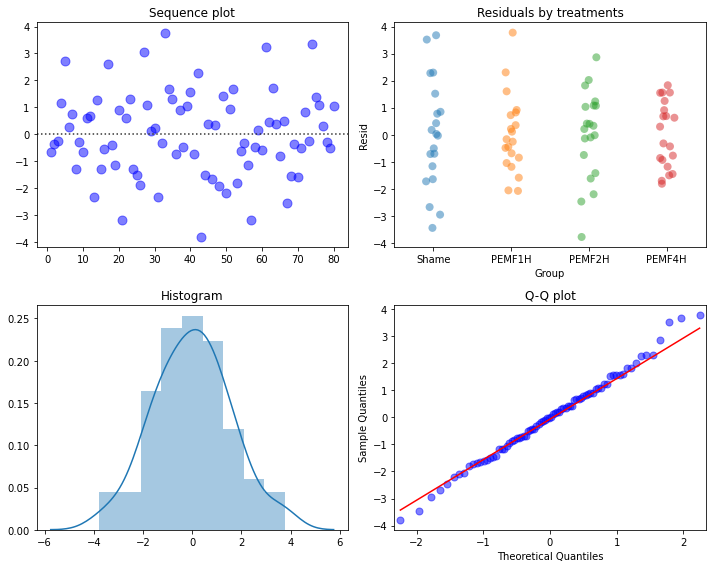

In [20]:
check_anova_normality(data1['PEMF'], PEMF_BMD_model.resid)

### ***b). Analyze the residuals and comment on the model assumptions and accuracy***
            จาก Sequence plot จะเห็นได้ว่า มีการกระจายตัวแบบสุ่ม ซึ่งไม่มี Pattern เป็นการเก็บข้อมูลแบบสุ่มที่ดี
            จาก Residual by treatments จะเห็นได้ว่า มีการกระจายตัวของข้อมูลที่ใกล้กัน ซึ่งจะบ่งบอกถึงการกระจายตัวแบบ Normal Distribution
            จาก Histogram จะเห็นได้ว่า ข้อมูลมีการกระจายตัวแบบ Normal distribution
            จาก Q-Q plot จะเห็นได้ว่า ข้อมูลอยู่บนเส้นเทรนด์ ไม่ได้หลุดออกจากเส้นมากนัก จึงสรุปได้ว่า มีการกระจายตัวแบบ Normal Distribution เช่นกัน

---------------------------------

# Question 3 Latin Square

In [11]:
df2 = pd.read_excel('HW1-Dataset.xlsx' , sheet_name='Ingredients-Time')
df2

,Time,Batch,Day,Ingredients
0,8,1,1,A
1,7,1,2,B
2,1,1,3,D
3,7,1,4,C
4,3,1,5,E
5,11,2,1,C
6,2,2,2,E
7,7,2,3,A
8,3,2,4,D
9,8,2,5,B


In [22]:
p = len(df2.Ingredients.unique()) 
N = p*p
y = df2.Time
total_y = np.sum(y)

In [23]:
y_ingre = df2.groupby('Ingredients').aggregate({'Time':'sum'}).Time
SS = np.sum(y_ingre**2)
SSTr = (1/p)*SS - (total_y**2)/N 
MSTr = SSTr/(p-1)
SSTr, MSTr

(141.44000000000005, 35.360000000000014)

In [24]:
y_row = df2.groupby('Batch').aggregate({'Time':'sum'}).Time
SS = np.sum(y_row**2)
SSRow = (1/p)*SS - (total_y**2)/N 
MSRow = SSRow/(p-1)
MSRow

3.8600000000000136

In [25]:
y_col = df2.groupby('Day').aggregate({'Time':'sum'}).Time
SS = np.sum(y_col**2)
SSCol = (1/p)*SS - (total_y**2)/N 
MSCol = SSCol/(p-1)
MSCol

3.0600000000000023

In [26]:
SST = np.sum(y**2) - (total_y**2)/N 
SSE = SST - SSTr - SSRow - SSCol 
MSE = SSE/((p-2)*(p-1))
MSE

3.126666666666656

In [27]:
from scipy import stats
print("SST = {:.1f}, SSTr = {:.1f}, SSRow = {:.1f}, SSCol = {:.1f}, SSE = {:.1f}".format(SST, SSTr, SSRow, SSCol, SSE))
print("MSTr = {:.1f}, MSRow = {:.1f}, MSCol = {:.1f}, MSE = {:.1f}".format(MSTr, MSRow, MSCol, MSE))

F0 = MSTr/MSE

alpha=0.05
p_val = stats.f.sf(F0, p-1,(p-2)*(p-1)) 
crit_val = stats.f.isf(0.05, p-1, (p-2)*(p-1))

print("Critical value at {:.2f} = {:.2f}".format(alpha, crit_val)) 
print("F0 = {:.3f}, P-value = {:.3f}".format(F0, p_val))

SST = 206.6, SSTr = 141.4, SSRow = 15.4, SSCol = 12.2, SSE = 37.5
MSTr = 35.4, MSRow = 3.9, MSCol = 3.1, MSE = 3.1
Critical value at 0.05 = 3.26
F0 = 11.309, P-value = 0.000


#### จากการทำ Latin Square ซึ่งมี P-value = 0.000 ซึ่งมีค่าน้อยกว่า 0.05 ทำให้ทราบว่า ข้อมูลแต่ละชุดมีความสัมพันธ์กัน แต่ไม่ทำให้ทราบว่าข้อมูลคู่ไหนมีความสัมพันธ์กันบ้าง

In [28]:
group_mean = df2.groupby('Ingredients').aggregate({'Time':'mean'}).Time
group_mean

Ingredients
A    8.4
B    5.6
C    8.8
D    3.4
E    3.2
Name: Time, dtype: float64

In [29]:
from statsmodels.stats.libqsturng import psturng, qsturng

margin_err = qsturng(0.95, p, (p-2)*(p-1))*np.sqrt(MSE/p)

import itertools 

allpairs = list(itertools.combinations(sorted(df2.Ingredients.unique()),2))
tukey_df = pd.DataFrame(allpairs, columns={'group1','group2'}) 
tukey_df['meandiff'] = tukey_df.apply(lambda x: group_mean[x['group2']] - group_mean[x['group1']], axis=1)
tukey_df['lower'] = tukey_df.apply(lambda x: x['meandiff'] - margin_err, axis=1) 
tukey_df['upper'] = tukey_df.apply(lambda x: x['meandiff'] + margin_err, axis=1) 
tukey_df['reject'] = tukey_df.apply(lambda x: 'False' if x['lower'] < 0 and x['upper'] > 0 else 'True', axis=1) 
tukey_df

,group2,group1,meandiff,lower,upper,reject
0,A,B,2.8,-0.765317,6.365317,False
1,A,C,-0.4,-3.965317,3.165317,False
2,A,D,5.0,1.434683,8.565317,True
3,A,E,5.2,1.634683,8.765317,True
4,B,C,-3.2,-6.765317,0.365317,False
5,B,D,2.2,-1.365317,5.765317,False
6,B,E,2.4,-1.165317,5.965317,False
7,C,D,5.4,1.834683,8.965317,True
8,C,E,5.6,2.034683,9.165317,True
9,D,E,0.2,-3.365317,3.765317,False


ผลจากการทำ Tukey HSD Test ทำให้ทราบว่า ข้อมูลชุด A-D, A-E , C-D, C-E มีความสัมพันธ์กัน

In [30]:
E1 = (MSRow+MSCol+(p-1)*MSE)/((p+1)*MSE)
E2 = (MSCol+(p-1)*MSE)/(p*MSE)
E3 = (MSRow+(p-1)*MSE)/(p*MSE)
print('E1 = {:.2f}, E2 = {:.2f}, E3 = {:.2f}'.format(E1,E2,E3))

E1 = 1.04, E2 = 1.00, E3 = 1.05


E3 มีค่าสูงที่สุด ซึ่งบ่งบอกว่าความแปรปรวนของ Model กับ column factor มีความสัมพันธ์กันมาก ดังนั้น Row factor (Batch) มีส่วนทำให้ประสิทธิภาพในการ block มากกว่า